## Assignment 3 -- RNNs for stock price prediction

### Setup

In [1]:
import sys
import sklearn
from sklearn.model_selection import train_test_split

import numpy as np
import os, time
import pandas as pd

import tensorflow as tf
from tensorflow import keras


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

### 1.  Load data

Choose the AAL -- American Airlines Group, Inc. - Common Stock

In [2]:
df = pd.read_csv('stocks/AAL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-27,21.049999,21.400000,19.100000,19.299999,18.194910,961200
1,2005-09-28,19.299999,20.530001,19.200001,20.500000,19.326199,5747900
2,2005-09-29,20.400000,20.580000,20.100000,20.209999,19.052801,1078200
3,2005-09-30,20.260000,21.049999,20.180000,21.010000,19.806999,3123300
4,2005-10-03,20.900000,21.750000,20.900000,21.500000,20.268938,1057900
...,...,...,...,...,...,...,...
3648,2020-03-26,16.059999,17.240000,15.160000,15.660000,15.660000,77530600
3649,2020-03-27,14.980000,15.220000,13.910000,14.040000,14.040000,50783500
3650,2020-03-30,13.200000,13.220000,11.810000,12.250000,12.250000,50516800
3651,2020-03-31,12.900000,12.960000,12.100000,12.190000,12.190000,44851400


In [3]:
#check null number
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3653 non-null   object 
 1   Open       3653 non-null   float64
 2   High       3653 non-null   float64
 3   Low        3653 non-null   float64
 4   Close      3653 non-null   float64
 5   Adj Close  3653 non-null   float64
 6   Volume     3653 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.9+ KB


<AxesSubplot:xlabel='Date'>

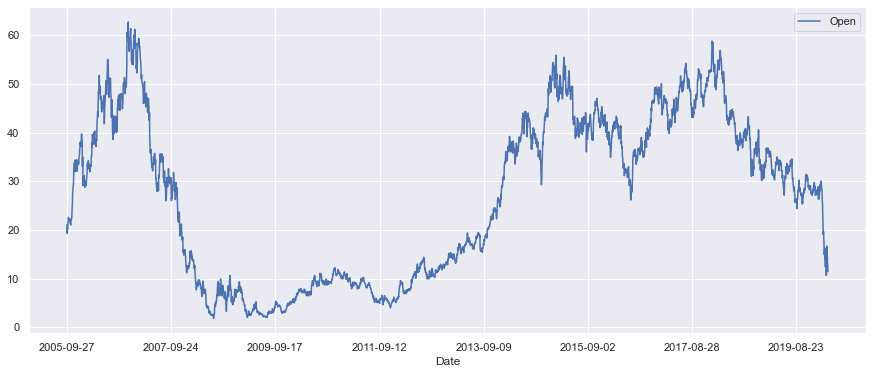

In [4]:
df.plot(x='Date', y='Open',figsize = (15,6))

### 2. Data split and preprocess

In [5]:
train_val_set = df[:round(len(df)*0.8)].iloc[:,:2] 
train_val_set['Date'] = pd.to_datetime(train_val_set['Date'])

train_set = train_val_set[:round(len(train_val_set)*0.8)]
valid_set = train_val_set[round(len(train_val_set)*0.8):]

test_set = df[round(len(df)*0.8):].iloc[:,:2]
test_set['Date'] = pd.to_datetime(test_set['Date']) 


print(f"Shape of train set: {train_set.shape}")
print(f"Shape of valid set: {valid_set.shape}")
print(f"Shape of test set: {test_set.shape}")


Shape of train set: (2338, 2)
Shape of valid set: (584, 2)
Shape of test set: (731, 2)


In [6]:
train_set = train_set.Open.values
train_set = np.reshape(train_set, (-1,1))

valid_set = valid_set.Open.values
valid_set = np.reshape(valid_set, (-1,1))

test_set = test_set.Open.values
test_set = np.reshape(test_set, (-1,1))

print(f"Shape of train set: {train_set.shape}")
print(f"Shape of valid set: {valid_set.shape}")
print(f"Shape of test set: {test_set.shape}")

Shape of train set: (2338, 1)
Shape of valid set: (584, 1)
Shape of test set: (731, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

train_scaled = scaler.fit_transform(train_set)
valid_scaled = scaler.fit_transform(valid_set)
test_scaled = scaler.fit_transform(test_set)


In [8]:
X_train = []
y_train = []

for i in range(50, len(train_scaled)):
    X_train.append(train_scaled[i-50:i,0])
    y_train.append(train_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (2288, 50, 1)
Shape of y_train: (2288, 1)


In [9]:
X_val = []
y_val = []

for i in range(50, len(valid_scaled)):
    X_val.append(valid_scaled[i-50:i,0])
    y_val.append(valid_scaled[i,0])

X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
y_val = np.reshape(y_val, (y_val.shape[0],1))

print(f"Shape of X_valid: {X_val.shape}")
print(f"Shape of y_valid: {y_val.shape}")

Shape of X_valid: (534, 50, 1)
Shape of y_valid: (534, 1)


In [17]:
X_test = []
y_test = []

for i in range(50, len(test_scaled)):
    X_test.append(test_scaled[i-50:i,0])
    y_test.append(test_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_test: (681, 50, 1)
Shape of y_test: (681, 1)


### 3. RNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#### 3.1 simple RNN

In [11]:
rnn = Sequential()
#first rnn layer
rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, 
              input_shape = (X_train.shape[1],1)))
#second rnn layer
rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
#third rnn layer
rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
#forth rnn layer
rnn.add(SimpleRNN(units = 50))
#output layer
rnn.add(Dense(1))

rnn.summary()


2022-11-25 03:08:48.511341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compile setting
rnn.compile(optimizer='adam', loss='mean_squared_error')
# fit the RNN model
history = rnn.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))


Epoch 1/20
46/46 [==============================] - 5s 49ms/step - loss: 0.0193 - val_loss: 0.0049
Epoch 2/20
46/46 [==============================] - 2s 40ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 3/20
46/46 [==============================] - 2s 39ms/step - loss: 6.5306e-04 - val_loss: 0.0034
Epoch 4/20
46/46 [==============================] - 2s 39ms/step - loss: 6.5875e-04 - val_loss: 0.0030
Epoch 5/20
46/46 [==============================] - 2s 39ms/step - loss: 7.2473e-04 - val_loss: 0.0031
Epoch 6/20
46/46 [==============================] - 2s 39ms/step - loss: 5.9149e-04 - val_loss: 0.0029
Epoch 7/20
46/46 [==============================] - 2s 39ms/step - loss: 4.9621e-04 - val_loss: 0.0027
Epoch 8/20
46/46 [==============================] - 2s 39ms/step - loss: 6.9168e-04 - val_loss: 0.0024
Epoch 9/20
46/46 [==============================] - 2s 40ms/step - loss: 6.2772e-04 - val_loss: 0.0026
Epoch 10/20
46/46 [==============================] - 2s 40ms/step - loss: 4.9778e

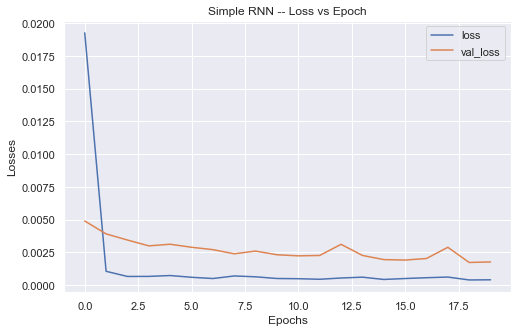

In [13]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN -- Loss vs Epoch")
plt.show()

In [18]:
y_pred = rnn.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 0s 17ms/step


array([[52.49274 ],
       [51.892166],
       [51.182503],
       [50.998093],
       [50.915897],
       [50.288757],
       [49.94906 ],
       [49.60642 ],
       [48.87208 ],
       [48.828426],
       [49.217438],
       [49.943157],
       [49.785984],
       [49.64588 ],
       [49.689323],
       [49.73718 ],
       [49.225235],
       [48.436893],
       [47.710873],
       [47.773533],
       [47.789318],
       [47.693035],
       [47.50414 ],
       [46.888355],
       [45.70759 ],
       [44.770096],
       [44.4755  ],
       [44.003498],
       [42.93068 ],
       [43.09766 ],
       [43.61765 ],
       [44.309868],
       [43.610184],
       [43.77738 ],
       [44.031197],
       [43.744762],
       [43.019924],
       [42.604435],
       [43.267338],
       [43.923355],
       [44.834816],
       [45.83861 ],
       [45.678097],
       [45.412838],
       [44.61767 ],
       [44.5365  ],
       [44.242016],
       [44.788345],
       [45.531178],
       [46.788456],


In [19]:
y_test_inverse = scaler.inverse_transform(y_test)
y_test_inverse

array([[52.25999832],
       [52.72000122],
       [52.13000107],
       [51.79000092],
       [51.5       ],
       [50.63000107],
       [50.34000015],
       [49.02000046],
       [50.84999847],
       [51.13000107],
       [50.88999939],
       [50.56000137],
       [50.66999817],
       [50.81999969],
       [50.68000031],
       [49.74000168],
       [49.02999878],
       [48.5       ],
       [48.86000061],
       [48.75999832],
       [48.63999939],
       [48.25      ],
       [46.29999924],
       [45.72999954],
       [45.84999847],
       [45.16999817],
       [44.13000107],
       [43.09000015],
       [45.22999954],
       [44.52999878],
       [44.54000092],
       [44.54000092],
       [44.84999847],
       [44.79000092],
       [43.09000015],
       [44.18999863],
       [43.81000137],
       [44.00999832],
       [45.90000153],
       [46.34999847],
       [46.79000092],
       [45.29999924],
       [46.02000046],
       [45.27999878],
       [44.91999817],
       [45

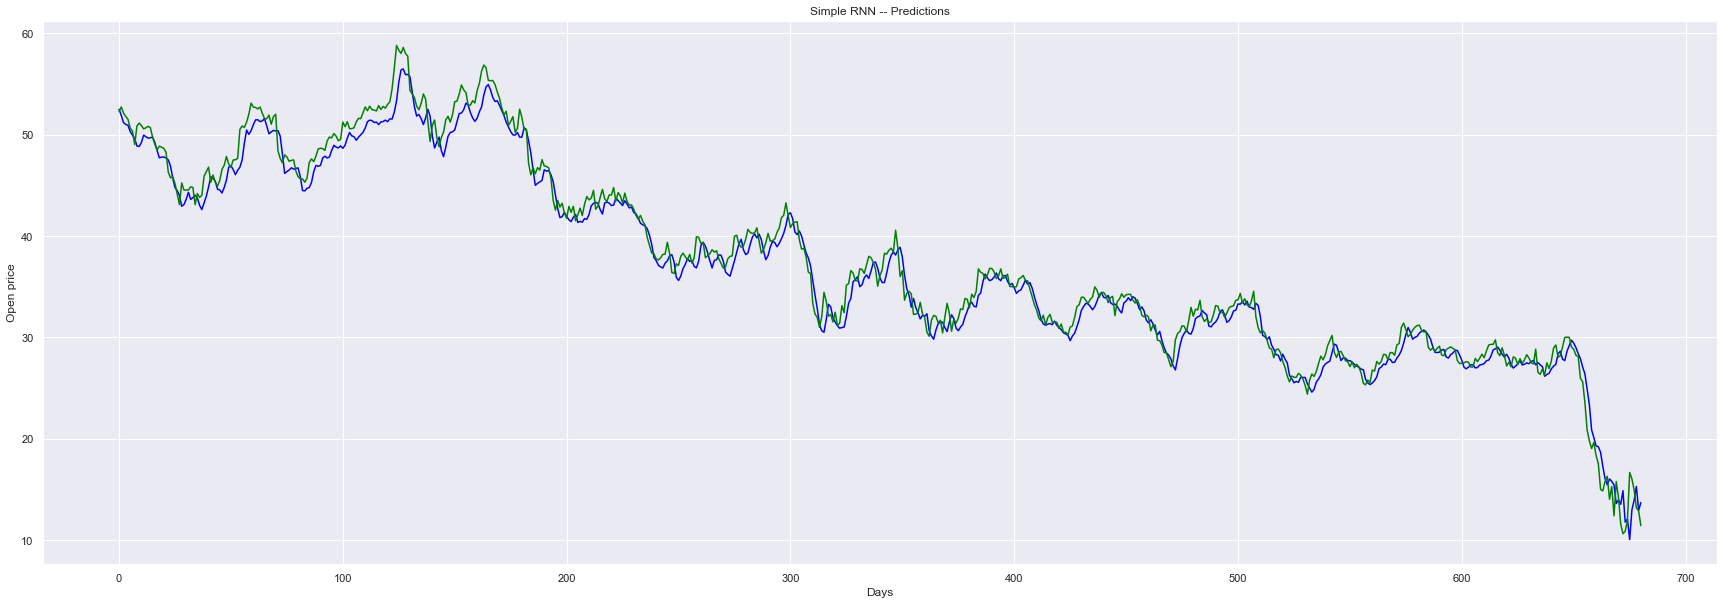

In [20]:
# prediction
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN -- Predictions")
plt.show()


In [21]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2 = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 score : {R2}")


MSE : 1.8113569656679893
RMSE : 1.3458666225402833
R2 score : 0.9795283260227253


#### 3.2 modified RNN

##### dropout layer

In [22]:
#add dropout layer
rnn1 = Sequential()
#first rnn layer
rnn1.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, 
              input_shape = (X_train.shape[1],1)))
rnn1.add(Dropout(0.2))
#second rnn layer
rnn1.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn1.add(Dropout(0.2))
#third rnn layer
rnn1.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn1.add(Dropout(0.2))
#forth rnn layer
rnn1.add(SimpleRNN(units = 50))
rnn1.add(Dropout(0.2))
#output layer
rnn1.add(Dense(1))

rnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)               

In [23]:
rnn1.compile(optimizer='adam', loss='mean_squared_error')
# fit the RNN model
history = rnn1.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))


Epoch 1/20
46/46 [==============================] - 5s 52ms/step - loss: 0.3184 - val_loss: 0.0097
Epoch 2/20
46/46 [==============================] - 2s 42ms/step - loss: 0.1811 - val_loss: 0.0085
Epoch 3/20
46/46 [==============================] - 2s 42ms/step - loss: 0.1087 - val_loss: 0.0145
Epoch 4/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0717 - val_loss: 0.0272
Epoch 5/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0509 - val_loss: 0.0076
Epoch 6/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0403 - val_loss: 0.0119
Epoch 7/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0323 - val_loss: 0.0135
Epoch 8/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0262 - val_loss: 0.0054
Epoch 9/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0215 - val_loss: 0.0109
Epoch 10/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0195 - val_loss: 0.0070
Epoch 11/

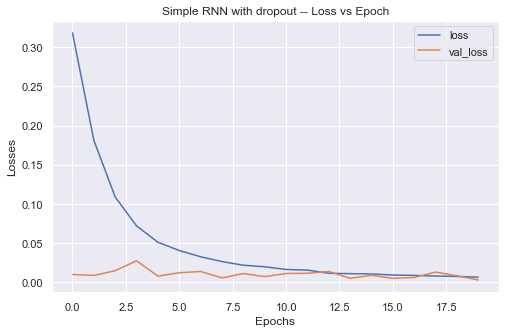

In [24]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN with dropout -- Loss vs Epoch")
plt.show()

In [25]:
y_pred = rnn1.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 1s 20ms/step


array([[54.204174 ],
       [54.345898 ],
       [53.995403 ],
       [53.73561  ],
       [53.669342 ],
       [53.470367 ],
       [53.029152 ],
       [52.482845 ],
       [51.734116 ],
       [51.26376  ],
       [51.53974  ],
       [51.843082 ],
       [51.78864  ],
       [51.682915 ],
       [51.627163 ],
       [51.526463 ],
       [51.17847  ],
       [50.874016 ],
       [50.340576 ],
       [49.806725 ],
       [49.807476 ],
       [49.817635 ],
       [49.739662 ],
       [49.2367   ],
       [48.25655  ],
       [47.44897  ],
       [46.97196  ],
       [46.631123 ],
       [45.721462 ],
       [45.289963 ],
       [45.35869  ],
       [45.608444 ],
       [45.641617 ],
       [45.939404 ],
       [45.768276 ],
       [45.339535 ],
       [44.890774 ],
       [44.908066 ],
       [44.776207 ],
       [44.856785 ],
       [45.59929  ],
       [46.540394 ],
       [46.88288  ],
       [46.891563 ],
       [46.733017 ],
       [46.50377  ],
       [46.162575 ],
       [46.61

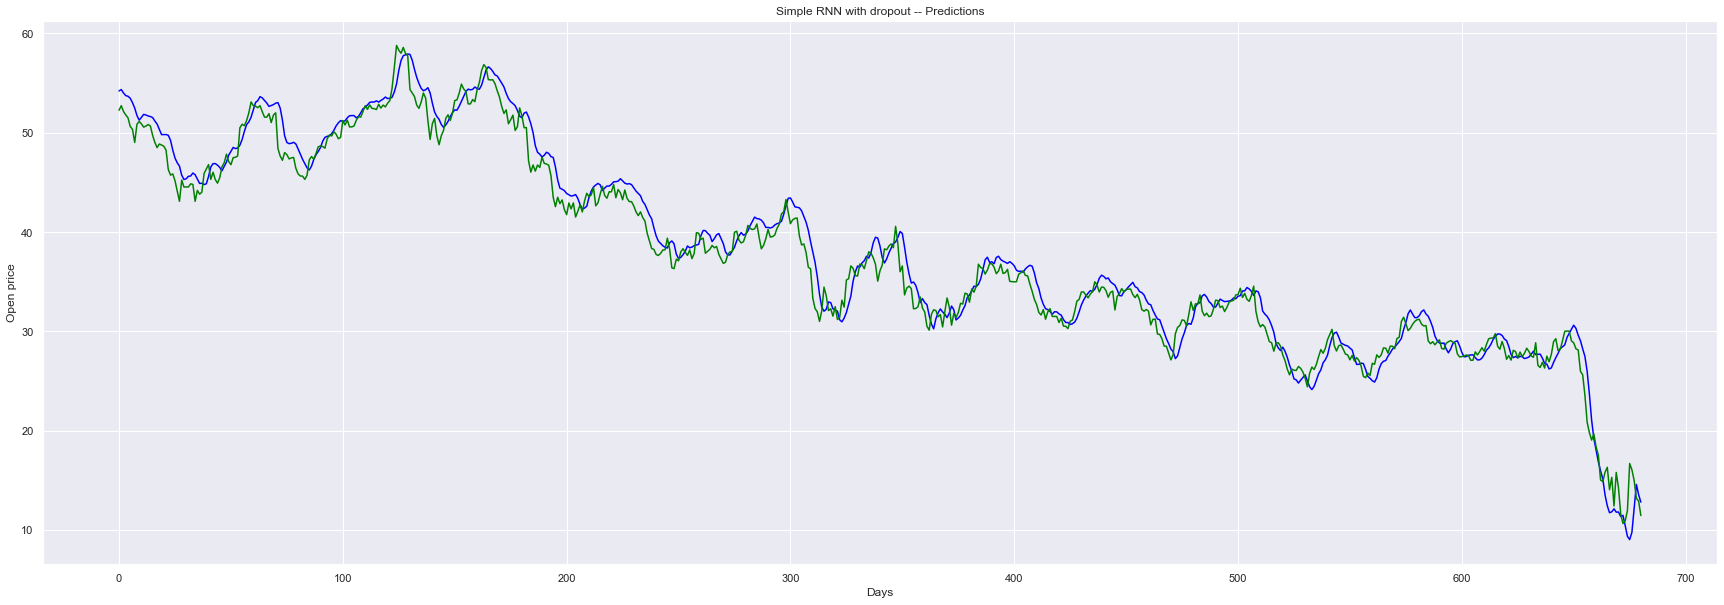

In [26]:
# prediction
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN with dropout -- Predictions")
plt.show()

In [30]:
MSE = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2 = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 score : {R2}")

MSE : 2.5542734208883604
RMSE : 1.5982094421221396
R2 score : 0.975782730404721


##### more layers

In [31]:
rnn2 = Sequential()
#first rnn layer
rnn2.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, 
              input_shape = (X_train.shape[1],1)))
#second rnn layer
rnn2.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
#third rnn layer
rnn2.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
#forth rnn layer
rnn2.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
#fifth rnn layer
rnn2.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
#sixth rnn layer
rnn2.add(SimpleRNN(units = 50))
#output layer
rnn2.add(Dense(1))

rnn2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 50, 50)            5050      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                

In [32]:
rnn2.compile(optimizer='adam', loss='mean_squared_error')
# fit the RNN model
history = rnn2.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))


Epoch 1/20
46/46 [==============================] - 7s 75ms/step - loss: 0.0430 - val_loss: 0.0081
Epoch 2/20
46/46 [==============================] - 3s 60ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 3/20
46/46 [==============================] - 3s 59ms/step - loss: 9.7281e-04 - val_loss: 0.0041
Epoch 4/20
46/46 [==============================] - 3s 59ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 5/20
46/46 [==============================] - 3s 59ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 6/20
46/46 [==============================] - 3s 59ms/step - loss: 9.1396e-04 - val_loss: 0.0035
Epoch 7/20
46/46 [==============================] - 3s 59ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 8/20
46/46 [==============================] - 3s 59ms/step - loss: 9.7753e-04 - val_loss: 0.0040
Epoch 9/20
46/46 [==============================] - 3s 59ms/step - loss: 8.4576e-04 - val_loss: 0.0029
Epoch 10/20
46/46 [==============================] - 3s 60ms/step - loss: 6.6499e-04 - val_lo

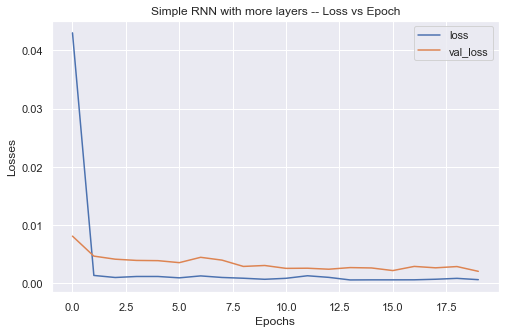

In [33]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN with more layers -- Loss vs Epoch")
plt.show()

In [34]:
y_pred = rnn2.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 1s 16ms/step


array([[52.76926  ],
       [52.675133 ],
       [52.293365 ],
       [51.789867 ],
       [51.593815 ],
       [51.105434 ],
       [50.891712 ],
       [50.510674 ],
       [49.802685 ],
       [49.60143  ],
       [49.435665 ],
       [50.043983 ],
       [50.1537   ],
       [50.259777 ],
       [50.091976 ],
       [49.944237 ],
       [49.805542 ],
       [49.475163 ],
       [48.957832 ],
       [48.53393  ],
       [48.33801  ],
       [48.2074   ],
       [48.110374 ],
       [47.69567  ],
       [46.864544 ],
       [45.884377 ],
       [45.22951  ],
       [44.70474  ],
       [44.12669  ],
       [43.90045  ],
       [43.79827  ],
       [44.211624 ],
       [44.142536 ],
       [44.421413 ],
       [44.32418  ],
       [44.159843 ],
       [43.843628 ],
       [43.364563 ],
       [43.547012 ],
       [43.875084 ],
       [44.774494 ],
       [45.56092  ],
       [45.914593 ],
       [45.989494 ],
       [45.387524 ],
       [45.09882  ],
       [44.71004  ],
       [45.13

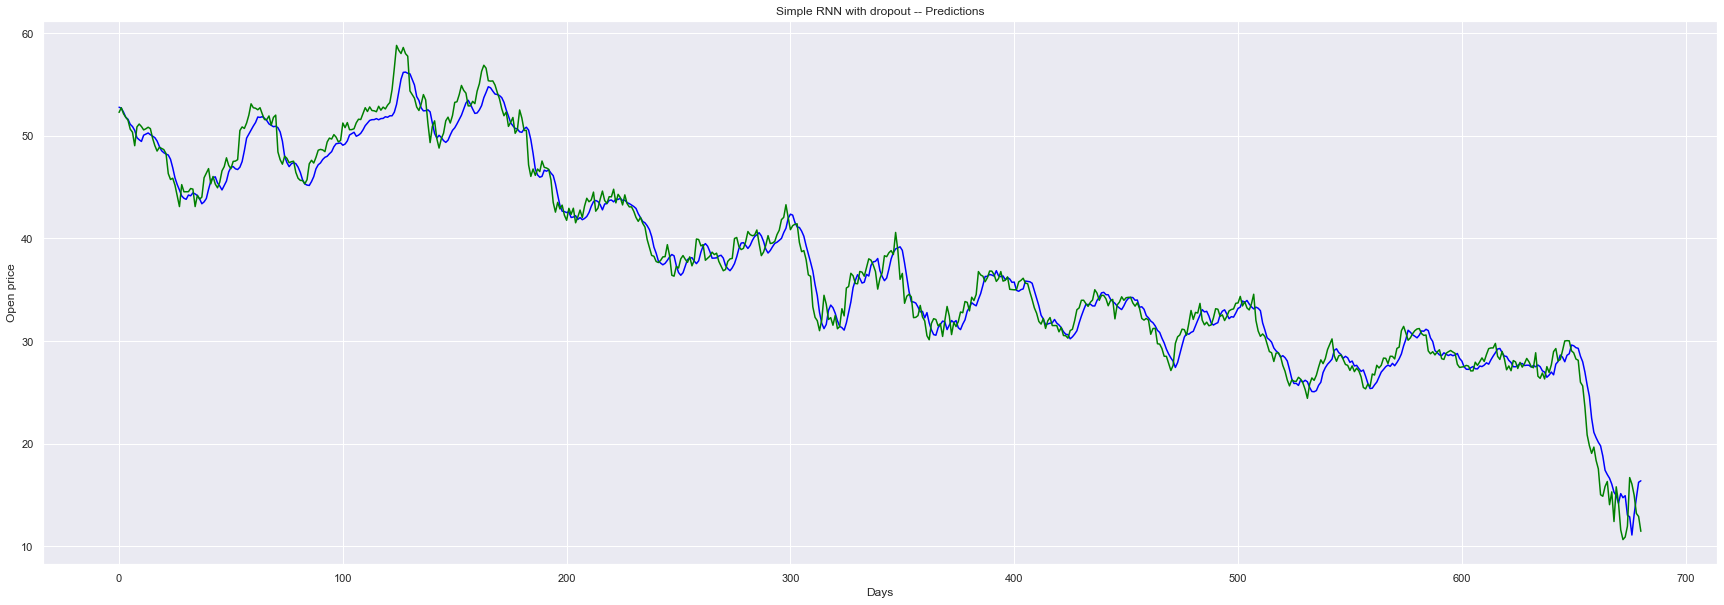

In [35]:
# prediction
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN with dropout -- Predictions")
plt.show()

In [36]:
MSE = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2 = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"R2 score : {R2}")

MSE : 1.9083464812515858
RMSE : 1.3814291444918867
R2 score : 0.9785413317463104


In [37]:
from tabulate import tabulate
rnn_head = ["Model", "MSE", "RMSE", "R2"]
rnn_table = [
    ["rnn",1.811,1.346,0.980],
    ["rnn1",2.554,1.598,0.976],
    ["rnn2",1.908,1.381,0.979]
]

print(tabulate(rnn_table, headers=rnn_head, tablefmt="grid"))

+---------+-------+--------+-------+
| Model   |   MSE |   RMSE |    R2 |
+=========+=======+========+=======+
| rnn     | 1.811 |  1.346 | 0.98  |
+---------+-------+--------+-------+
| rnn1    | 2.554 |  1.598 | 0.976 |
+---------+-------+--------+-------+
| rnn2    | 1.908 |  1.381 | 0.979 |
+---------+-------+--------+-------+


### 4. LSTM

#### 4.1 simple LSTM

In [38]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(LSTM(50,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm.add(LSTM(50, return_sequences= False))
lstm.add(Dense(1))
lstm.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [40]:
lstm.compile(loss = "mean_squared_error", optimizer = "adam")
history = lstm.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_data=(X_val, y_val))

Epoch 1/20
46/46 [==============================] - 7s 68ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 2/20
46/46 [==============================] - 2s 49ms/step - loss: 9.8906e-04 - val_loss: 0.0049
Epoch 3/20
46/46 [==============================] - 2s 48ms/step - loss: 9.2061e-04 - val_loss: 0.0048
Epoch 4/20
46/46 [==============================] - 2s 49ms/step - loss: 8.5553e-04 - val_loss: 0.0047
Epoch 5/20
46/46 [==============================] - 4s 87ms/step - loss: 8.1495e-04 - val_loss: 0.0044
Epoch 6/20
46/46 [==============================] - 3s 58ms/step - loss: 7.6947e-04 - val_loss: 0.0041
Epoch 7/20
46/46 [==============================] - 3s 54ms/step - loss: 7.1245e-04 - val_loss: 0.0038
Epoch 8/20
46/46 [==============================] - 3s 59ms/step - loss: 7.2673e-04 - val_loss: 0.0038
Epoch 9/20
46/46 [==============================] - 3s 66ms/step - loss: 6.2867e-04 - val_loss: 0.0040
Epoch 10/20
46/46 [==============================] - 3s 55ms/step - loss: 6.0

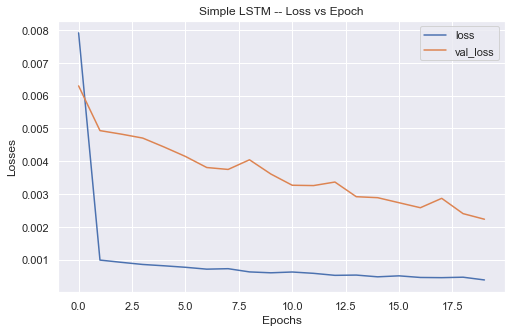

In [41]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple LSTM -- Loss vs Epoch")
plt.show()

In [42]:
y_pred = lstm.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 1s 15ms/step


array([[53.308323 ],
       [52.949677 ],
       [52.55638  ],
       [52.07813  ],
       [51.59144  ],
       [51.14776  ],
       [50.635197 ],
       [50.156036 ],
       [49.512993 ],
       [49.366226 ],
       [49.54329  ],
       [49.80708  ],
       [50.00479  ],
       [50.16538  ],
       [50.306717 ],
       [50.373375 ],
       [50.176373 ],
       [49.73848  ],
       [49.155804 ],
       [48.70331  ],
       [48.379623 ],
       [48.1667   ],
       [47.9754   ],
       [47.417023 ],
       [46.698627 ],
       [46.080402 ],
       [45.49137  ],
       [44.830246 ],
       [44.066956 ],
       [43.880245 ],
       [43.850822 ],
       [43.93633  ],
       [44.073925 ],
       [44.282932 ],
       [44.47267  ],
       [44.254417 ],
       [44.12361  ],
       [43.956455 ],
       [43.847458 ],
       [44.184223 ],
       [44.75368  ],
       [45.424976 ],
       [45.69002  ],
       [45.86536  ],
       [45.7758   ],
       [45.49153  ],
       [45.277523 ],
       [45.36

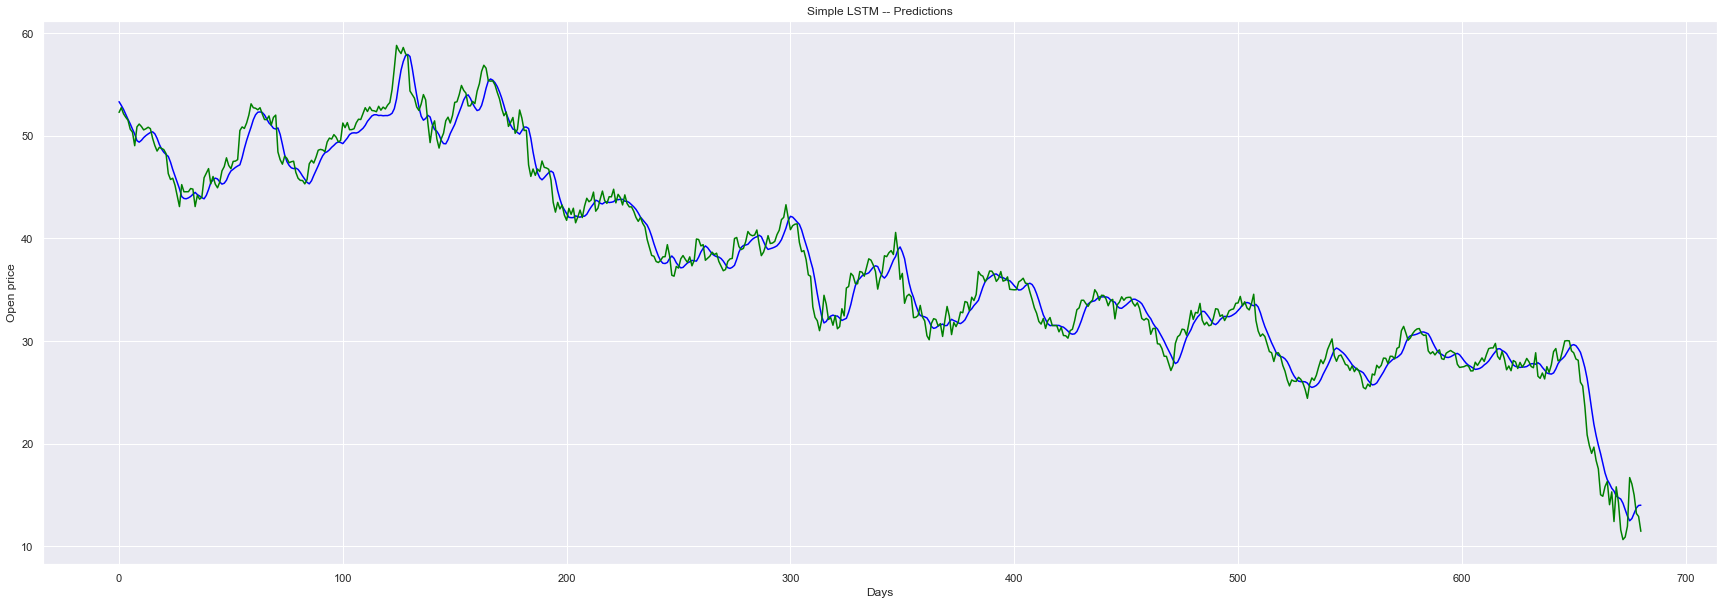

In [43]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple LSTM -- Predictions")
plt.show()

In [44]:
MSE_l1 = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE_l1 = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2_l1 = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE_l1}")
print(f"RMSE : {RMSE_l1}")
print(f"R2 score : {R2_l1}")

MSE : 1.7493709943002558
RMSE : 1.3226378923576383
R2 score : 0.9806358774503798


#### 4.2 modified LSTM

##### dropout

In [45]:
lstm1 = Sequential()
lstm1.add(LSTM(50,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm1.add(LSTM(50, return_sequences= False))
lstm1.add(Dropout(0.2))
lstm1.add(Dense(1))
lstm1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [46]:
lstm1.compile(loss = "mean_squared_error", optimizer = "adam")
history = lstm1.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_data=(X_val, y_val))

Epoch 1/20
46/46 [==============================] - 9s 73ms/step - loss: 0.0168 - val_loss: 0.0053
Epoch 2/20
46/46 [==============================] - 2s 50ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 3/20
46/46 [==============================] - 2s 54ms/step - loss: 0.0025 - val_loss: 0.0047
Epoch 4/20
46/46 [==============================] - 2s 52ms/step - loss: 0.0024 - val_loss: 0.0044
Epoch 5/20
46/46 [==============================] - 2s 50ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 6/20
46/46 [==============================] - 2s 50ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 7/20
46/46 [==============================] - 2s 51ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 8/20
46/46 [==============================] - 2s 50ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 9/20
46/46 [==============================] - 2s 51ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 10/20
46/46 [==============================] - 3s 55ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 11/

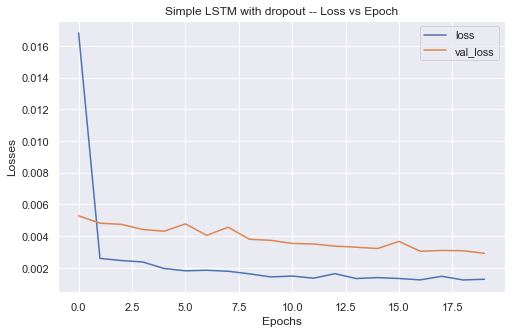

In [47]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple LSTM with dropout -- Loss vs Epoch")
plt.show()

In [48]:
y_pred = lstm1.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 1s 15ms/step


array([[53.652035],
       [53.60194 ],
       [53.444534],
       [53.156242],
       [52.785778],
       [52.37704 ],
       [51.887367],
       [51.38137 ],
       [50.763298],
       [50.39792 ],
       [50.250725],
       [50.22785 ],
       [50.248405],
       [50.311745],
       [50.41205 ],
       [50.504097],
       [50.46206 ],
       [50.261456],
       [49.926167],
       [49.59786 ],
       [49.29705 ],
       [49.036606],
       [48.785694],
       [48.331543],
       [47.75368 ],
       [47.186035],
       [46.60682 ],
       [45.969055],
       [45.253445],
       [44.84078 ],
       [44.563004],
       [44.412594],
       [44.359943],
       [44.41213 ],
       [44.51371 ],
       [44.42791 ],
       [44.380623],
       [44.30509 ],
       [44.24814 ],
       [44.436844],
       [44.798145],
       [45.277992],
       [45.5885  ],
       [45.85551 ],
       [45.9624  ],
       [45.917107],
       [45.8508  ],
       [45.90854 ],
       [46.078964],
       [46.404438],


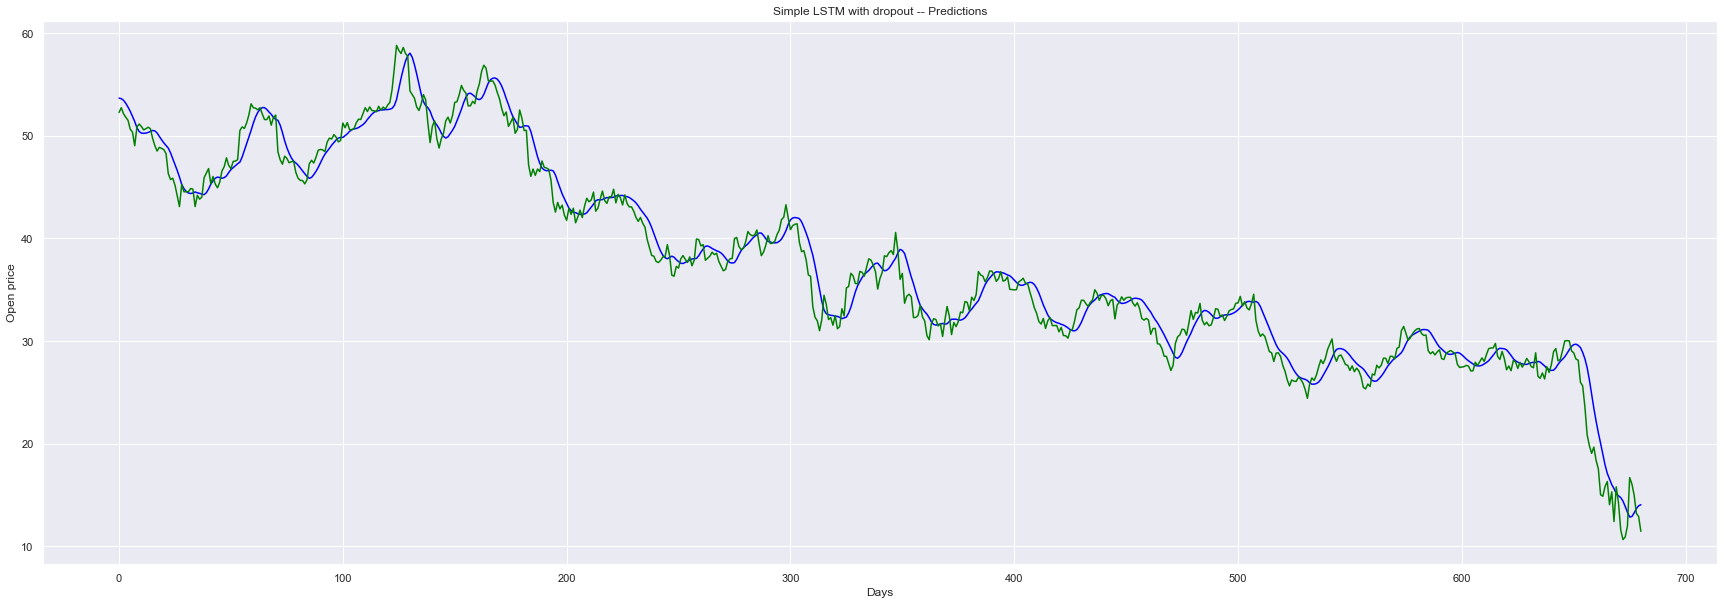

In [49]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple LSTM with dropout -- Predictions")
plt.show()

In [50]:
MSE_l2 = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE_l2 = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2_l2 = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE_l2}")
print(f"RMSE : {RMSE_l2}")
print(f"R2 score : {R2_l2}")

MSE : 2.4128680490698473
RMSE : 1.5533409313701378
R2 score : 0.9737590937863843


##### more layers

In [51]:
lstm2 = Sequential()
lstm2.add(LSTM(50,return_sequences=True,input_shape = (X_train.shape[1],1))) 
lstm2.add(LSTM(50,return_sequences=True))
lstm2.add(LSTM(50,return_sequences=True))
lstm2.add(LSTM(50,return_sequences=True))
lstm2.add(LSTM(50, return_sequences= False))
lstm2.add(Dense(1))
lstm2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_6 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_7 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 91,251
Trainable params: 91,251
Non-trai

In [52]:
lstm2.compile(loss = "mean_squared_error", optimizer = "adam")
history = lstm2.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_data=(X_val, y_val))

Epoch 1/20
46/46 [==============================] - 24s 240ms/step - loss: 0.0207 - val_loss: 0.0108
Epoch 2/20
46/46 [==============================] - 6s 136ms/step - loss: 0.0029 - val_loss: 0.0132
Epoch 3/20
46/46 [==============================] - 7s 145ms/step - loss: 0.0024 - val_loss: 0.0092
Epoch 4/20
46/46 [==============================] - 6s 129ms/step - loss: 0.0021 - val_loss: 0.0090
Epoch 5/20
46/46 [==============================] - 7s 148ms/step - loss: 0.0019 - val_loss: 0.0084
Epoch 6/20
46/46 [==============================] - 6s 128ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 7/20
46/46 [==============================] - 6s 122ms/step - loss: 0.0017 - val_loss: 0.0077
Epoch 8/20
46/46 [==============================] - 6s 125ms/step - loss: 0.0014 - val_loss: 0.0073
Epoch 9/20
46/46 [==============================] - 6s 125ms/step - loss: 0.0014 - val_loss: 0.0066
Epoch 10/20
46/46 [==============================] - 6s 125ms/step - loss: 0.0013 - val_loss: 0.007

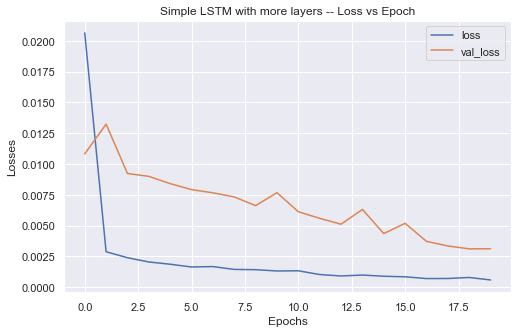

In [53]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple LSTM with more layers -- Loss vs Epoch")
plt.show()

In [54]:
y_pred = lstm2.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 3s 43ms/step


array([[53.922115],
       [53.844654],
       [53.44107 ],
       [52.955563],
       [52.58852 ],
       [52.36165 ],
       [52.085648],
       [51.653336],
       [50.987488],
       [50.510513],
       [50.56131 ],
       [50.9784  ],
       [51.30349 ],
       [51.290405],
       [51.06877 ],
       [50.88012 ],
       [50.714214],
       [50.40247 ],
       [49.872036],
       [49.341324],
       [49.04101 ],
       [48.993324],
       [49.004772],
       [48.652   ],
       [47.807262],
       [46.825882],
       [46.06833 ],
       [45.54098 ],
       [44.992428],
       [44.6002  ],
       [44.50527 ],
       [44.65648 ],
       [44.879288],
       [45.06032 ],
       [45.164486],
       [45.00371 ],
       [44.672813],
       [44.36371 ],
       [44.22937 ],
       [44.50809 ],
       [45.237705],
       [46.19215 ],
       [46.816555],
       [46.88375 ],
       [46.505394],
       [45.967785],
       [45.61492 ],
       [45.724   ],
       [46.281548],
       [47.087406],


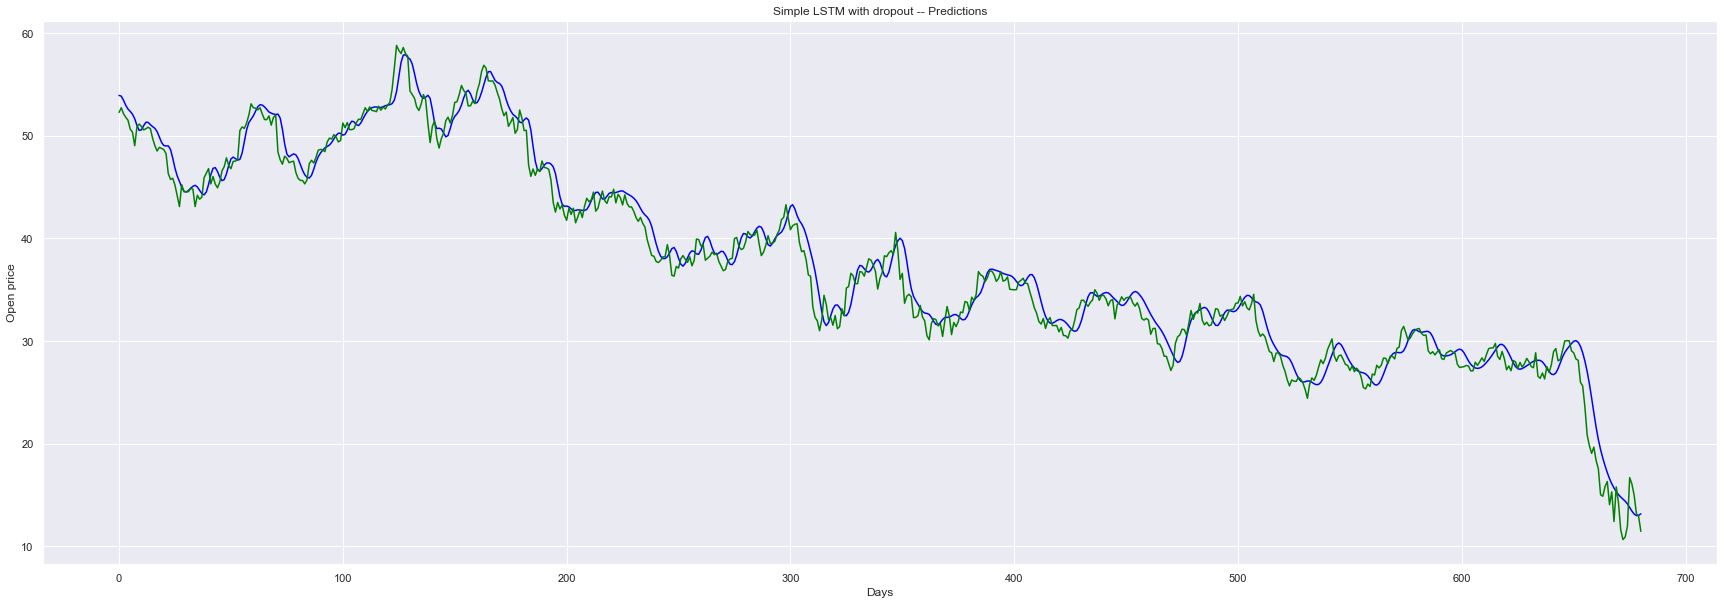

In [55]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple LSTM with dropout -- Predictions")
plt.show()

In [56]:
MSE_l3 = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE_l3 = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2_l3 = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE_l3}")
print(f"RMSE : {RMSE_l3}")
print(f"R2 score : {R2_l3}")

MSE : 2.289829967601777
RMSE : 1.513218413713558
R2 score : 0.975807741468546


In [57]:
lstm_head = ["Model", "MSE", "RMSE", "R2"]
lstm_table = [
    ["lstm",MSE_l1,RMSE_l1,R2_l1],
    ["lstm1",MSE_l2,RMSE_l2,R2_l2],
    ["lstm2",MSE_l3,RMSE_l3,R2_l3]
]

print(tabulate(lstm_table, headers=lstm_head, tablefmt="grid"))

+---------+---------+---------+----------+
| Model   |     MSE |    RMSE |       R2 |
+=========+=========+=========+==========+
| lstm    | 1.74937 | 1.32264 | 0.980636 |
+---------+---------+---------+----------+
| lstm1   | 2.41287 | 1.55334 | 0.973759 |
+---------+---------+---------+----------+
| lstm2   | 2.28983 | 1.51322 | 0.975808 |
+---------+---------+---------+----------+


### 5. Parameter tuning

In [61]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#### 5.1 RNN

In [93]:
def build_model(hp):
    model = Sequential()
    model.add(SimpleRNN(hp.Int('input_unit',min_value=32,max_value=96,step=32),return_sequences=True, input_shape = (X_train.shape[1],1)))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(SimpleRNN(hp.Int(f'rnn_{i}_units',min_value=32,max_value=96,step=32),return_sequences=True))
    model.add(SimpleRNN(hp.Int('layer_2_neurons',min_value=32,max_value=96,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0.1,max_value=0.3,step=0.1)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    return model

In [94]:
tuner0= RandomSearch(
        build_model,
        objective='mse',
        overwrite=True,
        max_trials=2,
        directory='Desktop'
        )

In [100]:
tuner0.search(
        x=X_train,
        y=y_train,
        epochs=20,
        batch_size=64,
        validation_data=(X_val,y_val)
)

Trial 2 Complete [00h 00m 31s]
mse: 0.0025523784570395947

Best mse So Far: 0.00066447100834921
Total elapsed time: 00h 01m 03s
INFO:tensorflow:Oracle triggered exit


In [101]:
best_rnn = tuner0.get_best_models(num_models=1)[0]
best_rnn

In [102]:
y_pred = best_rnn.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 1s 12ms/step


array([[53.20821  ],
       [53.197533 ],
       [53.102562 ],
       [52.88966  ],
       [52.676464 ],
       [52.55438  ],
       [52.34859  ],
       [51.99152  ],
       [51.483746 ],
       [51.341866 ],
       [51.199085 ],
       [51.39048  ],
       [51.47955  ],
       [51.478596 ],
       [51.484985 ],
       [51.36377  ],
       [51.008255 ],
       [50.612053 ],
       [50.176723 ],
       [49.967094 ],
       [49.683453 ],
       [49.69078  ],
       [49.59283  ],
       [49.151352 ],
       [48.413933 ],
       [47.659622 ],
       [47.001778 ],
       [46.22246  ],
       [45.518032 ],
       [45.392094 ],
       [45.38234  ],
       [45.566    ],
       [45.257366 ],
       [45.30344  ],
       [45.306866 ],
       [44.78085  ],
       [44.39287  ],
       [43.883358 ],
       [44.436092 ],
       [44.71831  ],
       [45.646732 ],
       [46.50306  ],
       [46.724163 ],
       [46.660233 ],
       [45.954117 ],
       [45.81911  ],
       [45.264393 ],
       [45.53

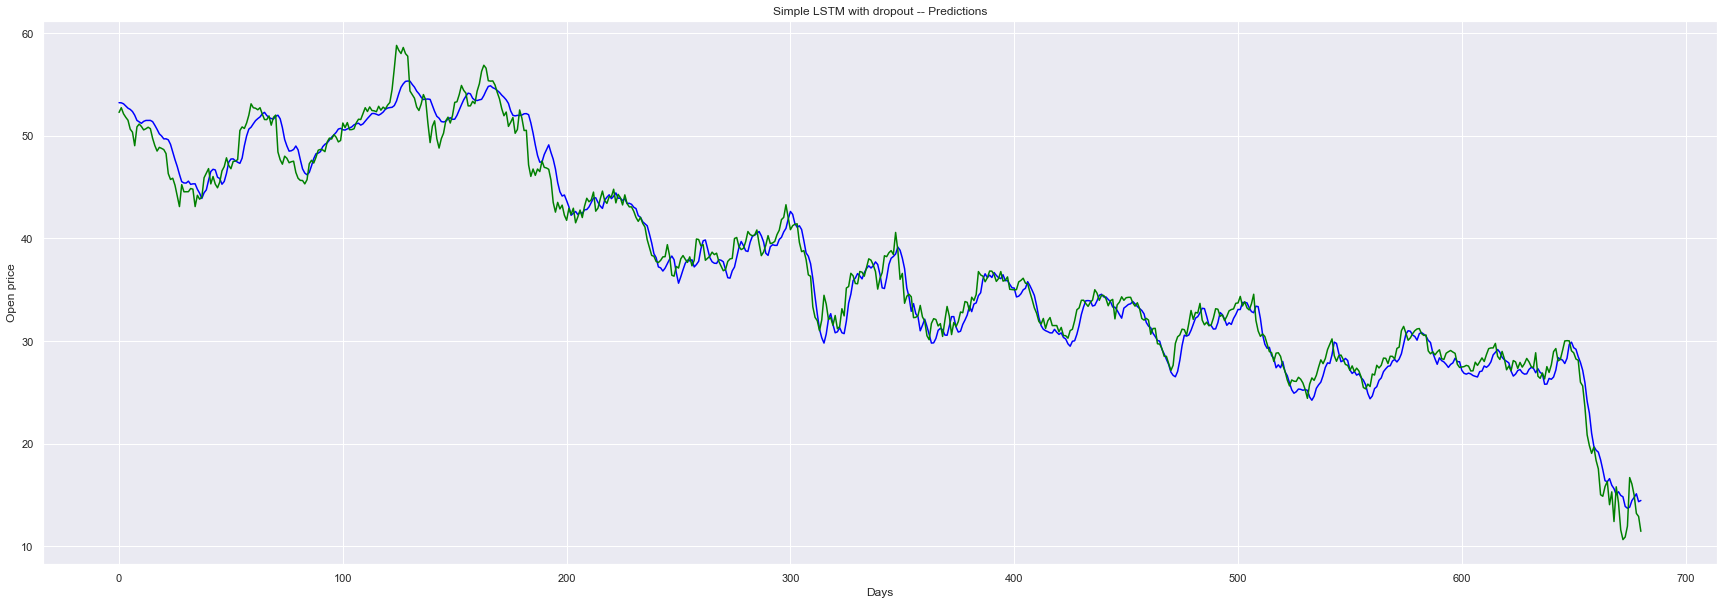

In [103]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple LSTM with dropout -- Predictions")
plt.show()

In [104]:
MSE_rnn = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE_rnn = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2_rnn = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE_rnn}")
print(f"RMSE : {RMSE_rnn}")
print(f"R2 score : {R2_rnn}")

MSE : 1.9680925676488155
RMSE : 1.4028872255633436
R2 score : 0.9802714740885656


#### 5.2 LSTM

In [58]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=96,step=32),return_sequences=True, input_shape = (X_train.shape[1],1)))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=96,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=96,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0.1,max_value=0.3,step=0.1)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    return model

In [86]:
tuner1= RandomSearch(
        build_model,
        objective='mse',
        overwrite=True,
        max_trials=2,
        directory='Desktop'
        )

In [87]:
tuner1.search(
        x=X_train,
        y=y_train,
        epochs=20,
        batch_size=64,
        validation_data=(X_val,y_val)
)

Trial 2 Complete [00h 01m 39s]
mse: 0.0013589916052296758

Best mse So Far: 0.0012040868168696761
Total elapsed time: 00h 03m 04s
INFO:tensorflow:Oracle triggered exit


In [96]:
best_lstm = tuner.get_best_models(num_models=1)[0]
best_lstm

In [97]:
y_pred = best_lstm.predict(X_test)  
y_pred_inverse = scaler.inverse_transform(y_pred)
y_pred_inverse

22/22 [==============================] - 2s 30ms/step


array([[54.789875 ],
       [54.87433  ],
       [54.770645 ],
       [54.49497  ],
       [54.08769  ],
       [53.60295  ],
       [53.06878  ],
       [52.518433 ],
       [51.94075  ],
       [51.438393 ],
       [51.105503 ],
       [50.973423 ],
       [51.01159  ],
       [51.17105  ],
       [51.403053 ],
       [51.654144 ],
       [51.840023 ],
       [51.88274  ],
       [51.74006  ],
       [51.448013 ],
       [51.071175 ],
       [50.674904 ],
       [50.298145 ],
       [49.887463 ],
       [49.399216 ],
       [48.847904 ],
       [48.256115 ],
       [47.628613 ],
       [46.95665  ],
       [46.352524 ],
       [45.883755 ],
       [45.583675 ],
       [45.452396 ],
       [45.476845 ],
       [45.621105 ],
       [45.770996 ],
       [45.88468  ],
       [45.934746 ],
       [45.92492  ],
       [45.94542  ],
       [46.074013 ],
       [46.34977  ],
       [46.693058 ],
       [47.040005 ],
       [47.3074   ],
       [47.430893 ],
       [47.415607 ],
       [47.34

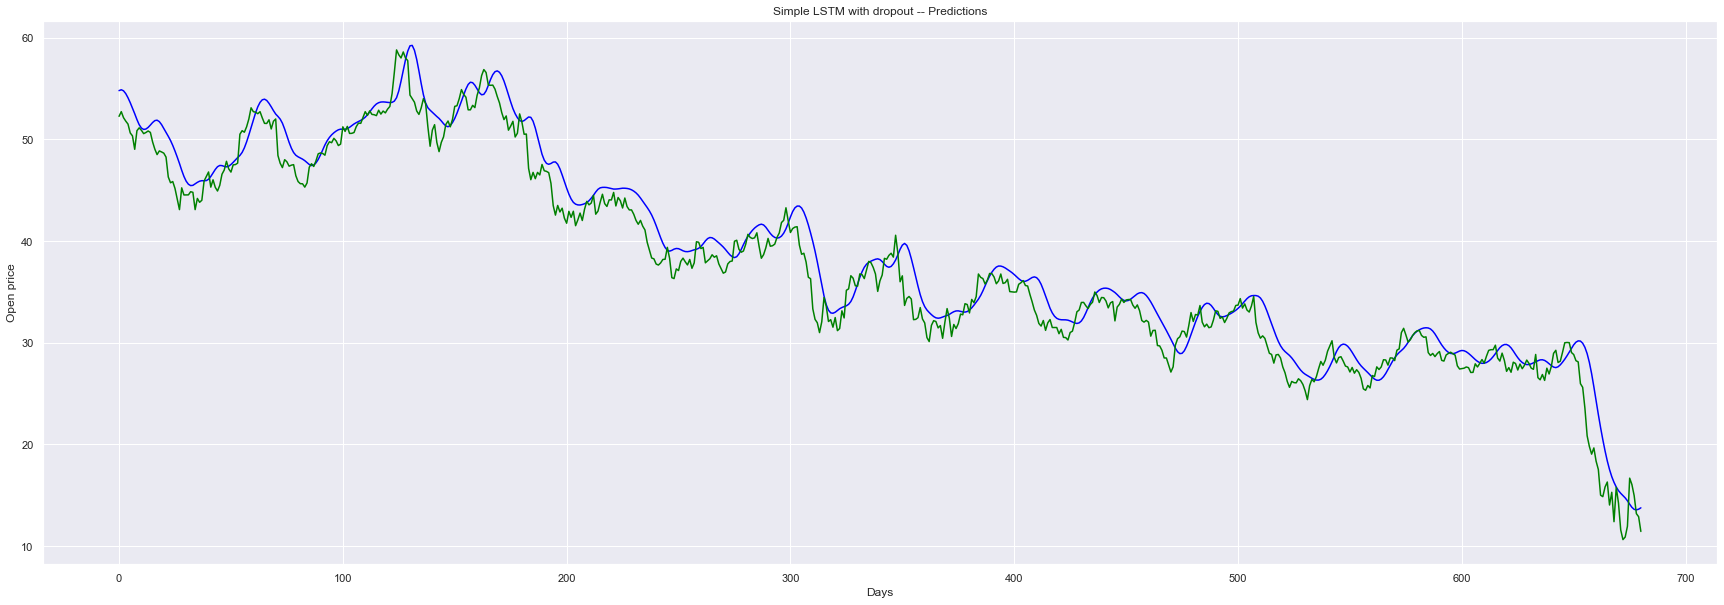

In [98]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_inverse, color = "blue", label = "y_pred" )
plt.plot(y_test_inverse, color = "green", label = "y_test")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple LSTM with dropout -- Predictions")
plt.show()

In [99]:
MSE_lstm = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)
RMSE_lstm = metrics.mean_squared_error(y_pred_inverse, y_test_inverse)**0.5
R2_lstm = metrics.r2_score(y_pred_inverse, y_test_inverse)

print(f"MSE : {MSE_lstm}")
print(f"RMSE : {RMSE_lstm}")
print(f"R2 score : {R2_lstm}")

MSE : 4.70114283659365
RMSE : 2.1682118984531127
R2 score : 0.9513122633768953


In [105]:
head = ["Model", "MSE", "RMSE", "R2"]
table = [
    ["lstm",MSE_lstm,RMSE_lstm,R2_lstm],
    ["rnn",MSE_rnn,RMSE_rnn,R2_rnn]  
]

print(tabulate(table, headers=head, tablefmt="grid"))

+---------+---------+---------+----------+
| Model   |     MSE |    RMSE |       R2 |
+=========+=========+=========+==========+
| lstm    | 4.70114 | 2.16821 | 0.951312 |
+---------+---------+---------+----------+
| rnn     | 1.96809 | 1.40289 | 0.980271 |
+---------+---------+---------+----------+
